In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
m = pd.read_csv("measurements.csv")

In [3]:
m.columns

Index(['ID', 'group', 'sex', 'birth_year', 'chol_init', 'chol_final',
       'trig_init', 'trig_final', 'weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_periemter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
      dtype='object')

In [4]:
m.columns = ['ID', 'group', 'sex', 'birth_year', 'chol_init', 'chol_final',
       'trig_init', 'trig_final', 'weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_perimeter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init']

In [5]:
m.insert(1, 'location', 'Cerna')

In [6]:
m.loc[m.group=='Test', 'location'] = pd.read_csv('spirometrie.csv')['Group (school)']

In [7]:
m.columns

Index(['ID', 'location', 'group', 'sex', 'birth_year', 'chol_init',
       'chol_final', 'trig_init', 'trig_final', 'weight_init', 'weight_final',
       'weight_diff', 'height_init', 'height_final', 'height_diff',
       'armspan_init', 'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_perimeter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
      dtype='object')

In [8]:
mm = m.melt(id_vars=['ID', 'location', 'group', 'sex', 'birth_year'],
       value_vars=['chol_init',
       'chol_final', 'trig_init', 'trig_final', 'weight_init', 'weight_final',
       'weight_diff', 'height_init', 'height_final', 'height_diff',
       'armspan_init', 'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_perimeter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
       var_name='parameter',
       value_name='value')

In [9]:
mm.columns

Index(['ID', 'location', 'group', 'sex', 'birth_year', 'parameter', 'value'], dtype='object')

In [10]:
mm = mm[['ID', 'sex', 'location', 'group', 'parameter', 'value']]

In [11]:
mm.columns

Index(['ID', 'sex', 'location', 'group', 'parameter', 'value'], dtype='object')

In [12]:
mm.insert(4, 'time', 't')

In [13]:
mm.columns

Index(['ID', 'sex', 'location', 'group', 'time', 'parameter', 'value'], dtype='object')

In [14]:
mm.parameter.unique()

array(['chol_init', 'chol_final', 'trig_init', 'trig_final',
       'weight_init', 'weight_final', 'weight_diff', 'height_init',
       'height_final', 'height_diff', 'armspan_init', 'armspan_final',
       'armspan_diff', 'arm_perimeter_init', 'arm_perimeter_final',
       'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init',
       'hip_perimeter_final', 'hip_perimeter_diff', 'BMI_init',
       'BMI_final', 'BMI_diff', 'tricipital_fold_final',
       'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'], dtype=object)

In [15]:
mm.loc[mm.parameter.str.endswith('_init'), 'time'] = 'initial test'
mm.loc[mm.parameter.str.endswith('_final'), 'time'] = 'final test'
mm.loc[mm.parameter.str.endswith('_diff'), 'time'] = 'difference'

In [16]:
mm.time.value_counts()

time
initial test    1040
final test      1040
difference       640
Name: count, dtype: int64

In [17]:
mm.parameter = mm.parameter.str.replace('_init','').str.replace('_final','').str.replace('_diff','')

In [18]:
mm.parameter.unique()

array(['chol', 'trig', 'weight', 'height', 'armspan', 'arm_perimeter',
       'thorax_perimeter', 'abdominal_perimeter', 'hip_perimeter', 'BMI',
       'tricipital_fold', 'abdominal_fold', 'subscapular_fold'],
      dtype=object)

In [19]:
mm.columns

Index(['ID', 'sex', 'location', 'group', 'time', 'parameter', 'value'], dtype='object')

In [20]:
mm.pivot(columns='parameter', index=['ID', 'sex', 'location', 'group', 'time'], values='value')

parameter                                    BMI  abdominal_fold  \
ID  sex location group   time                                      
c1  m   x        Control difference     0.351822             NaN   
                         final test    25.748393             NaN   
                         initial test  25.396571             NaN   
c10 m   x        Control difference     2.532749             NaN   
                         final test    25.599416             NaN   
...                                          ...             ...   
t8  f   Baia     Test    final test    22.206331            10.0   
                         initial test  27.688889            10.0   
t9  m   Baia     Test    difference    -2.151971             NaN   
                         final test    27.968016            33.0   
                         initial test  30.119987            50.0   

parameter                              abdominal_perimeter  arm_perimeter  \
ID  sex location group   time                                               
c1  m   x        Control difference                    2.0            2.0   
                         final test                   86.0           27.0   
                         initial test                 84.0           25.0   
c10 m   x        Control difference                    5.0            2.0   
                         final test                   93.0           28.0   
...                                                    ...            ...   
t8  f   Baia     Test    final test                   80.0           33.0   
                         initial test                 75.0           28.0   
t9  m   Baia     Test    difference                    2.0            5.0   
                         final test                  102.0           33.0   
                         initial test                100.0           28.0   

parameter                              armspan   chol  height  hip_perimeter  \
ID  sex location group   time                                                  
c1  m   x        Control difference        7.0    NaN     7.0            1.0   
                         final test      169.0    NaN   165.0           95.0   
                         initial test    162.0    NaN   158.0           94.0   
c10 m   x        Control difference        6.0    NaN     7.0            0.0   
                         final test      155.0    NaN   157.0           97.0   
...                                        ...    ...     ...            ...   
t8  f   Baia     Test    final test      172.0  172.0   163.0          115.0   
                         initial test    161.0  178.0   150.0          101.0   
t9  m   Baia     Test    difference       12.0    NaN    11.0            3.0   
                         final test      173.0  176.0   167.0          100.0   
                         initial test    161.0  182.0   156.0           97.0   

parameter                              subscapular_fold  thorax_perimeter  \
ID  sex location group   time                                               
c1  m   x        Control difference                 NaN              12.0   
                         final test                 NaN              70.0   
                         initial test               NaN              58.0   
c10 m   x        Control difference                 NaN              17.0   
                         final test                 NaN              94.0   
...                                                 ...               ...   
t8  f   Baia     Test    final test                11.0              96.0   
                         initial test               7.0              86.0   
t9  m   Baia     Test    difference                 NaN               5.0   
                         final test                21.0              98.0   
                         initial test              29.0              93.0   

parameter                              tricipital_fold  trig  weight  

In [21]:
mp = mm.pivot(columns='parameter', index=['ID', 'sex', 'location', 'group', 'time'], values='value').reset_index()

In [22]:
mp.columns

Index(['ID', 'sex', 'location', 'group', 'time', 'BMI', 'abdominal_fold',
       'abdominal_perimeter', 'arm_perimeter', 'armspan', 'chol', 'height',
       'hip_perimeter', 'subscapular_fold', 'thorax_perimeter',
       'tricipital_fold', 'trig', 'weight'],
      dtype='object', name='parameter')

In [23]:
mp.columns = mp.columns.str.replace('_',' ')

In [24]:
mp.columns

Index(['ID', 'sex', 'location', 'group', 'time', 'BMI', 'abdominal fold',
       'abdominal perimeter', 'arm perimeter', 'armspan', 'chol', 'height',
       'hip perimeter', 'subscapular fold', 'thorax perimeter',
       'tricipital fold', 'trig', 'weight'],
      dtype='object', name='parameter')

In [25]:
mp = mp[['ID', 'sex', 'location', 'group', 'time',
         'weight', 'height', 'armspan', 'BMI', 'chol', 'trig',
         'arm perimeter', 'thorax perimeter',
         'abdominal perimeter', 'hip perimeter',
         'tricipital fold', 'abdominal fold',
         'subscapular fold']]

In [26]:
mm.apply(lambda x: x.unique())

ID           [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11,...
sex                                                     [f, m]
location                                  [Jurilovca, Baia, x]
group                                          [Test, Control]
time                    [initial test, final test, difference]
parameter    [chol, trig, weight, height, armspan, arm_peri...
value        [183.0, 185.0, 188.0, 175.0, 174.0, 178.0, 182...
dtype: object

<Figure size 1600x800 with 0 Axes>

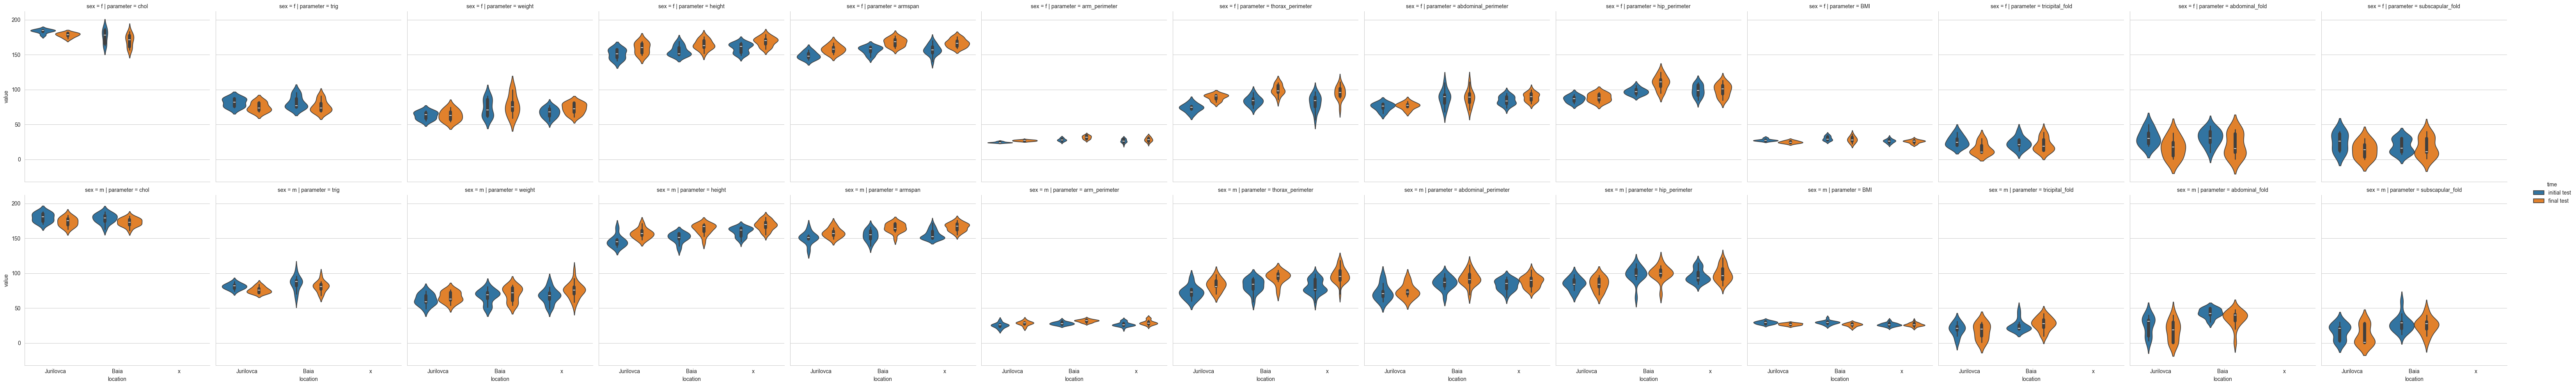

In [67]:
sns.set_style("whitegrid")
mpl.pyplot.figure(figsize=(16,8))
sns.catplot(data=mm.loc[mm.time!='difference'], x='location', y='value', row='sex', col='parameter', hue='time',
            sharex=True, sharey=True, 
            kind='violin', inner='box', split=False)
#plt.savefig('perim-all-detailed-sxsy.pdf')

In [28]:
mp.columns

Index(['ID', 'sex', 'location', 'group', 'time', 'weight', 'height', 'armspan',
       'BMI', 'chol', 'trig', 'arm perimeter', 'thorax perimeter',
       'abdominal perimeter', 'hip perimeter', 'tricipital fold',
       'abdominal fold', 'subscapular fold'],
      dtype='object', name='parameter')

In [29]:
mpsc = mp.copy()

In [30]:
mpsc[['weight', 'height', 'armspan', 'BMI', 'arm perimeter', 'thorax perimeter', 'abdominal perimeter', 'hip perimeter']] = mp[[
    'weight', 'height', 'armspan', 'BMI', 'arm perimeter', 'thorax perimeter', 'abdominal perimeter', 'hip perimeter'
    ]].apply(lambda x: x.loc[mp.group=='Test'] - x.loc[mp.group=='Control'].mean()).copy()

In [31]:
mpsc = mpsc[['ID', 'sex', 'location', 'group', 'time', 
             'weight', 'height', 'armspan', 'BMI',
             'arm perimeter', 'thorax perimeter',
             'abdominal perimeter', 'hip perimeter']].copy()

In [32]:
mpsc = mpsc.loc[mpsc.group=='Test'].copy()

In [33]:
mpsc

parameter,ID,sex,location,group,time,weight,height,armspan,BMI,arm perimeter,thorax perimeter,abdominal perimeter,hip perimeter
120,t1,f,Jurilovca,Test,difference,-50.053333,-104.498333,-96.916667,-20.151457,-17.333333,-43.35,-60.0,-67.116667
121,t1,f,Jurilovca,Test,final test,19.446667,53.501667,48.083333,7.688633,7.666667,27.65,20.0,18.883333
122,t1,f,Jurilovca,Test,initial test,19.946667,45.501667,34.083333,10.488804,5.666667,6.65,21.0,19.883333
123,t10,f,Jurilovca,Test,difference,-51.553333,-106.498333,-106.916667,-20.022771,-17.333333,-53.35,-57.0,-63.116667
124,t10,f,Jurilovca,Test,final test,15.446667,51.501667,50.083333,6.815877,8.666667,28.65,24.0,29.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,t8,f,Baia,Test,final test,9.446667,50.501667,61.083333,4.855045,13.666667,31.65,21.0,48.883333
236,t8,f,Baia,Test,initial test,12.746667,37.501667,50.083333,10.337603,8.666667,21.65,16.0,34.883333
237,t9,m,Baia,Test,difference,-44.853333,-101.498333,-98.916667,-19.503257,-14.333333,-59.35,-57.0,-63.116667
238,t9,m,Baia,Test,final test,28.446667,54.501667,62.083333,10.616730,13.666667,33.65,43.0,33.883333


In [34]:
mpscm = mpsc.melt(id_vars=['ID', 'sex', 'location', 'group', 'time'],
                  value_vars=['weight', 'height', 'armspan', 'BMI',
                              'arm perimeter', 'thorax perimeter',
                              'abdominal perimeter', 'hip perimeter'],
                  var_name='parameter',
                  value_name='value')

<Figure size 1600x800 with 0 Axes>

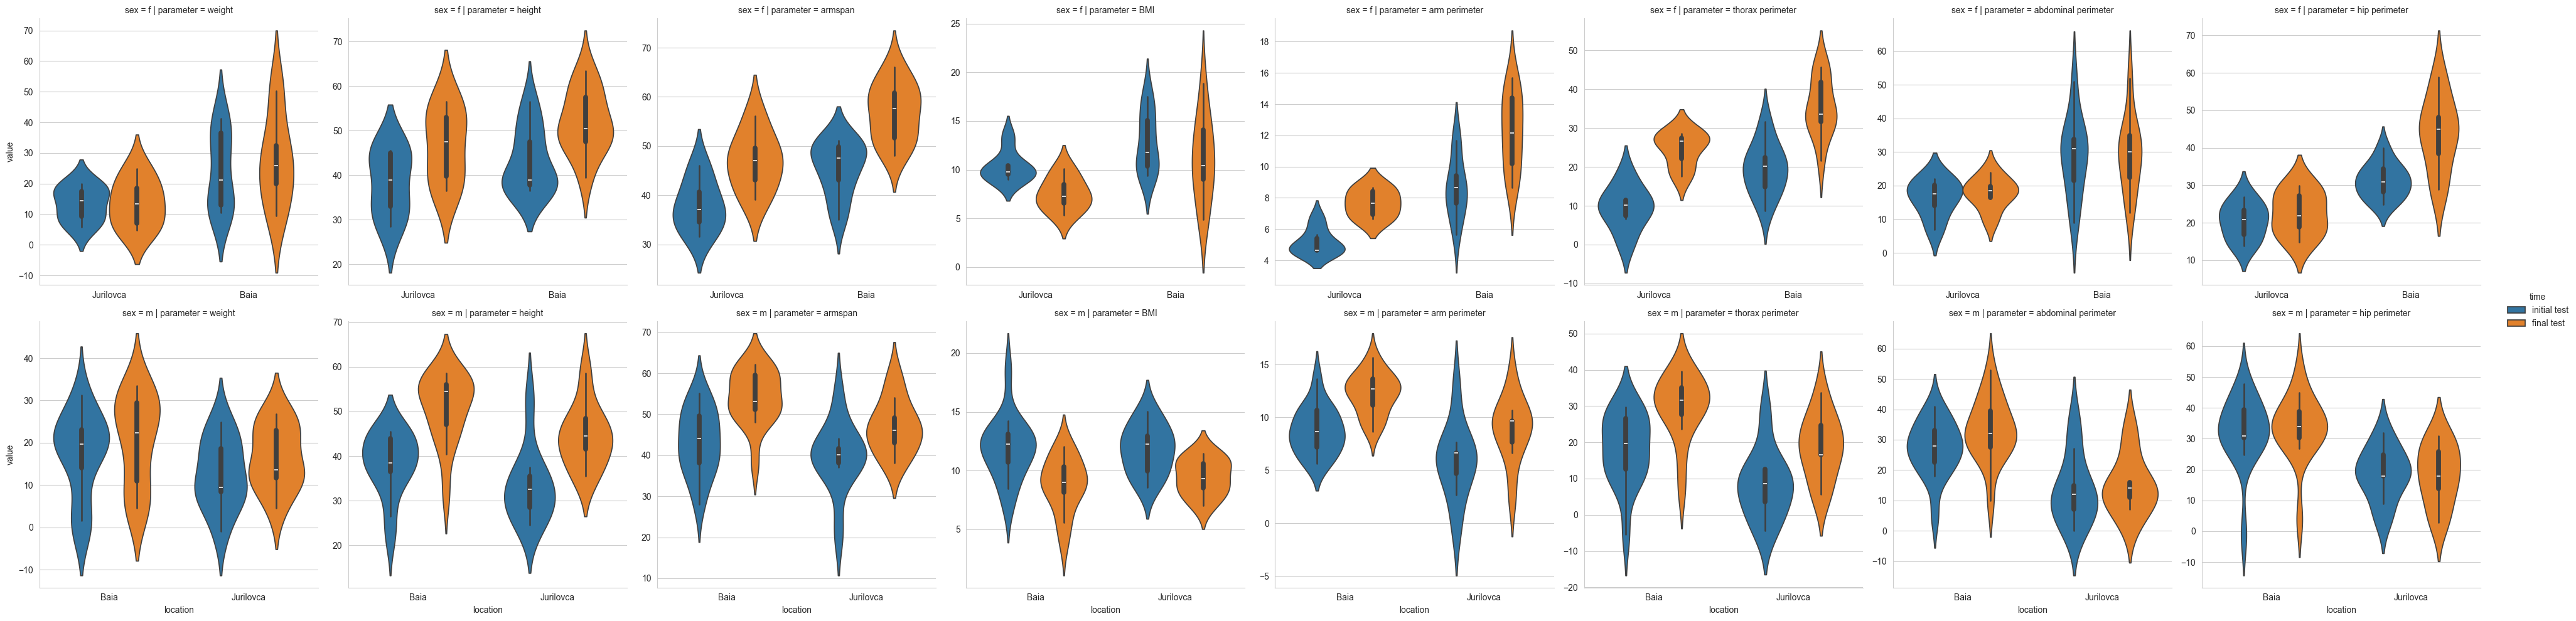

In [45]:
sns.set_style("whitegrid")             #Test-avg Control
mpl.pyplot.figure(figsize=(16,8))
sns.catplot(data=mpscm.loc[mpscm.time!='difference'], x='location', y='value', row='sex', col='parameter', hue='time', hue_order=['initial test', 'final test'],
            sharex=False, sharey=False, 
            kind='violin', inner='box', split=False)
#plt.savefig('perim-tminusc-detailed.pdf')

<Figure size 1600x800 with 0 Axes>

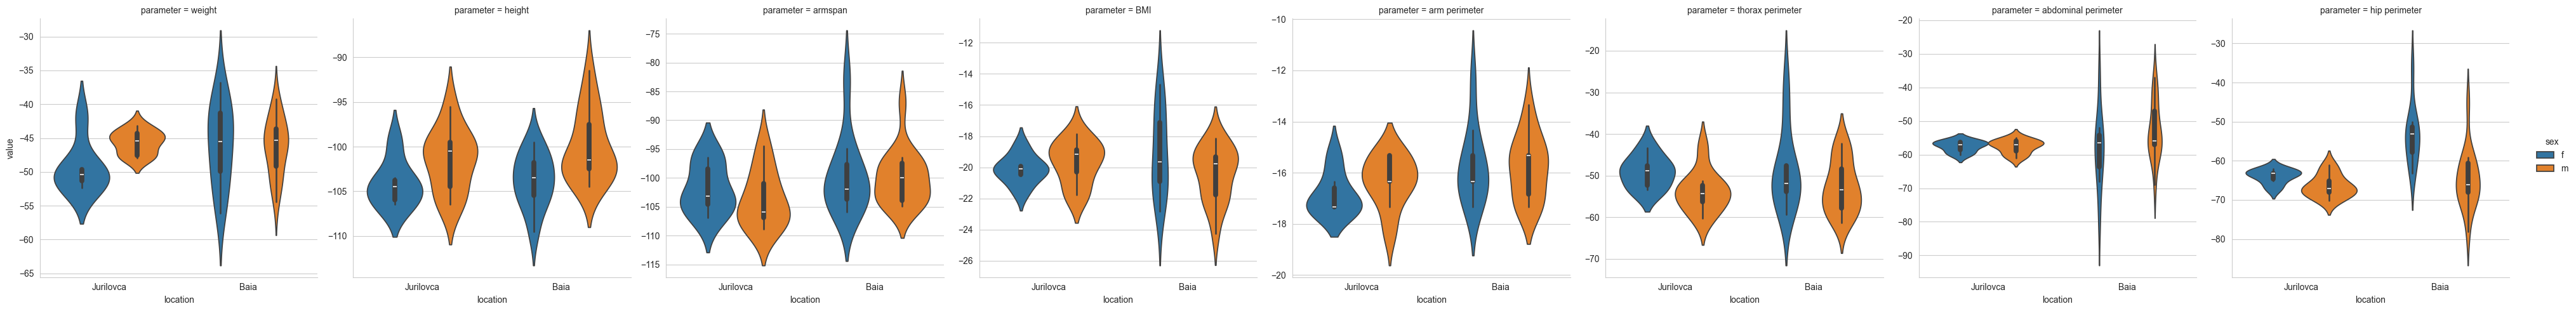

In [43]:
sns.set_style("whitegrid")           #double difference, just a value, no reference
mpl.pyplot.figure(figsize=(16,8))
sns.catplot(data=mpscm.loc[mpscm.time=='difference'], x='location', y='value', col='parameter', hue='sex',
            sharex=False, sharey=False, 
            kind='violin', inner='box', split=False)

<Figure size 1600x800 with 0 Axes>

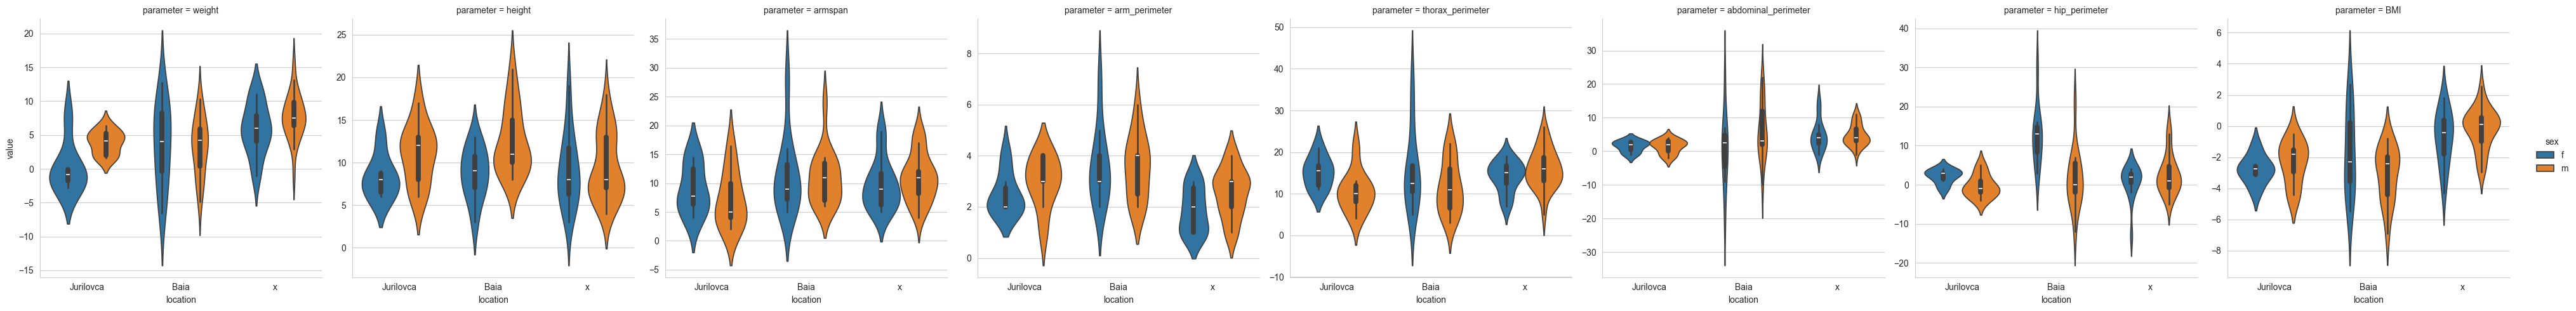

In [61]:
sns.set_style("whitegrid")            #Control vs Test
mpl.pyplot.figure(figsize=(16,8))
sns.catplot(data=mm.loc[mm.time=='difference'], x='location', y='value', col='parameter', hue='sex',
            sharex=False, sharey=False, 
            kind='violin', inner='box', split=False)
#plt.savefig('perim-ctrlvstest-detailed2.pdf')